#### Comparing training and test scores and what they mean
    Tr = Te (low) -- underfit
    Tr = Te (high) -- good fit
    Tr > Te -- overfit
    Tr < Te -- outliers

In [228]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Problem #1


Read in and check out the data

In [229]:
df = pd.read_csv('../data/1_train.csv')
df_test = pd.read_csv('../data/1_test.csv')

In [230]:
df.shape

(140, 3)

In [231]:
df.head()

,x1,x2,y
0,1994.0,17.0,737.721966
1,1987.0,11.0,372.012722
2,1990.0,4.0,298.244694
3,1991.0,5.0,353.815829
4,1998.0,15.0,899.943226


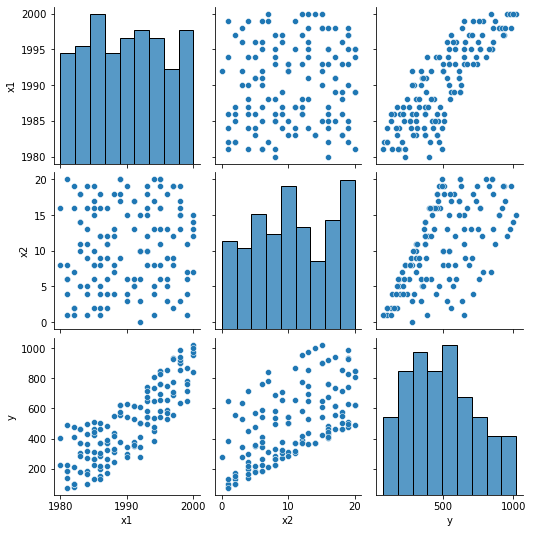

In [232]:
sns.pairplot(df)

Create a validation set

In [233]:
df_train, df_val = train_test_split(df, test_size=0.25, random_state=3)

 Train and validate a simple model


In [234]:
m = LinearRegression()
m.fit(df_train[['x1','x2']],df_train['y'])
m.score(df_train[['x1','x2']],df_train['y'])

0.9651482999504853

In [235]:
m.score(df_val[['x1','x2']],df_val['y'])

0.9362491347395374

Train and test are close, so no overfitting and no outliers. But can we do better? Yes, with some feature engineering!

x1 is expressed in years, so we can modify it to be age, and that provides a simpler model. Pair plot also showed some second-order effect for x1, so let's then take the square of that. 

In [236]:
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [237]:
min_year = min(df_train['x1']) 
df_train['x3'] = df_train['x1'] - min_year  # turn year to age
df_train['x4'] = df_train['x3']**2  # create squared term

In [238]:
m = LinearRegression()
m.fit(df_train[['x3', 'x4','x2']],df_train['y'])
m.score(df_train[['x3', 'x4','x2']],df_train['y'])

0.999994318356312

In [239]:
# Apply the same transformations to val before scoring
df_val['x3'] = df_val['x1'] - min_year  
df_val['x4'] = df_val['x3']**2  

m.score(df_val[['x3', 'x4','x2']],df_val['y'])

0.9999911936307535

Now retrain your chosen model and get the final score on test set.  
"Chosen model": linear regression where features are age, age squared, and x2.

In [240]:
# Retrain model on full dataset
min_year = min(df['x1']) 
df['x3'] = df['x1'] - min_year  
df['x4'] = df['x3']**2  

m = LinearRegression()
m.fit(df[['x3','x4','x2']],df['y'])
m.score(df[['x3','x4','x2']],df['y'])

0.9999939864203076

In [241]:
# Apply the same transformations to test set before scoring
df_test['x3'] = df_test['x1'] - min_year  
df_test['x4'] = df_test['x3']**2  
m.score(df_test[['x3','x4','x2']],df_test['y'])

0.9999932714177092

**Question**: Why did we use the min_year from training data when transforming the val and test sets?

# Problem #2 

There are a lot of missing values. We first leave out all of them and do a model. We realize that x1 is not contributing to the model. So leave out that column. Once we do that, we now have a lot more rows to work with. And that helps improve out score.

Read in and check out the data

In [201]:
df = pd.read_csv('../data/2_train.csv')
df_test = pd.read_csv('../data/2_test.csv')

In [202]:
df.shape

(150, 4)

In [203]:
df.head()

,x1,x2,x3,y
0,4.276693,0.959724,0.0,8.387655
1,3.782342,-0.698416,0.0,7.392687
2,2.670955,0.334660,0.0,10.834806
3,4.983984,0.629335,0.0,10.122782
4,4.297333,-0.596807,0.0,6.225075


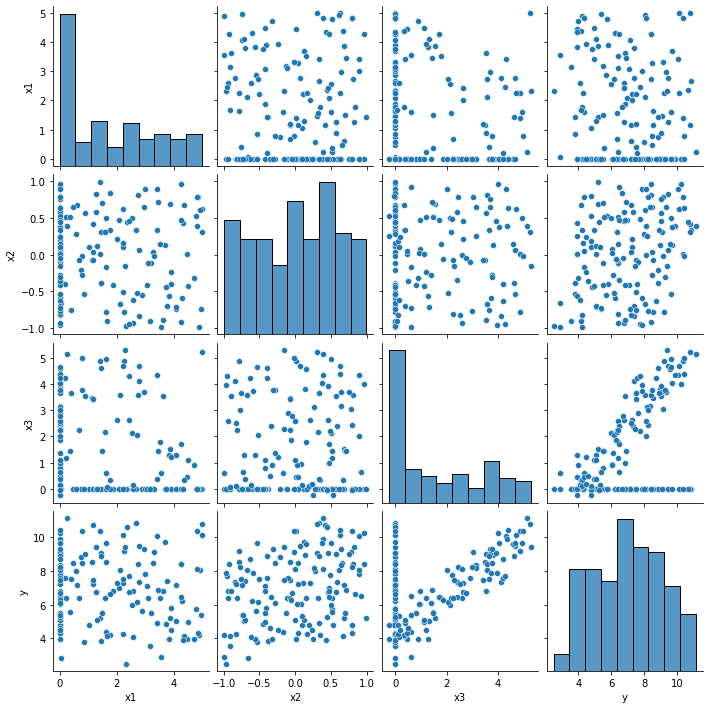

In [204]:
sns.pairplot(df)

Looks like there are a lot of zeros in x1 and x3 -- these are likely missing values that have been encoded as zero. Let's try dropping all those rows. This leaves us with only 50 observations to work with.

In [205]:
print(df[df.x1 == 0].shape)
print(df[df.x3 == 0].shape)

(50, 4)
(50, 4)


In [206]:
df_nonzero = df[(df.x1 != 0) & (df.x3 != 0)]

In [207]:
df_nonzero.shape

(50, 4)

Create a validation set

In [208]:
df_train, df_val = train_test_split(df_nonzero, test_size=0.25, random_state=3)

 Train and validate a simple model


In [209]:
m = LinearRegression()
m.fit(df_train[['x1','x2','x3']],df_train['y'])
m.score(df_train[['x1','x2','x3']],df_train['y'])

0.9542579931882706

In [210]:
m.score(df_val[['x1','x2','x3']],df_val['y'])

0.8741767245363379

In [211]:
m.coef_

array([-0.05115767,  1.00915987,  1.32468012])

The model is doing worse on the validation set than the train set, which means it's overfitting -- not surprising given our tiny dataset.

Pair plots showed a linear relationship between x3 and y (making it a useful feature), but not between x1 and y. So let's ignore the x1 feature and only drop rows where x3 is missing.

In [212]:
df_nonzero_x3 = df[(df.x3 != 0)]

In [213]:
df_nonzero_x3.shape

(100, 4)

Create a validation set

In [214]:
df_train, df_val = train_test_split(df_nonzero_x3, test_size=0.25, random_state=3)

 Train and validate a simple model


In [215]:
m = LinearRegression()
m.fit(df_train[['x2','x3']],df_train['y'])
m.score(df_train[['x2','x3']],df_train['y'])

0.9027773727401832

In [216]:
m.score(df_val[['x2','x3']],df_val['y'])

0.8997807959063369

No more overfitting!

Now retrain your chosen model and get the final score on test set.  
"Chosen model": linear regression where features are x2 and x3. Only train with rows where x3 is nonzero.

In [219]:
# Retrain model on full dataset
m = LinearRegression()
m.fit(df_nonzero_x3[['x2','x3']],df_nonzero_x3['y'])
m.score(df_nonzero_x3[['x2','x3']],df_nonzero_x3['y'])

0.9085208997597639

In [221]:
# Score on the test set
m.score(df_test[['x2','x3']],df_test['y'])

0.9176423965717333

**Question**: What would you do if there were rows where x3=0 in the test set?